## File structure
```{verbatim}
├── src
│   ├── utils
│   │   ├── utils.py
│   ├── demo.py

├── data
│   ├── aerial_photos
│   │   ├── GNSSINS
│   │   │   ├── EO_V355_TT-14525V_20210727_1.txt
│   │   ├── RGB
│   ├── SFKB
│   │   ├── geojson.json
│   ├── sosi.txt
```


In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from utils.utils import load_sfkb ,get_image_ids, transform_utm_buildings, dump_cutouts_and_objects
import os

#buildings = load_sfkb()
#buildings = get_image_ids(buildings)
#buildings = transform_utm_buildings(buildings)

#dump_cutouts_and_objects(buildings, image_ids)


<code>load_sfkb()</code> loads buildings from SFKB json file and stores them as instances of the Building class. Outputs a list of Building instances.

The keyword argument <code>max_buildings</code> can be used to limit how many buildings are loaded. 


In [2]:
buildings = load_sfkb(max_buildings=1000)

The keyword argument <code>max_buildings</code> can be used to limit how many buildings are loaded. 

The function initializes the properties <code>utm_corners, edges</code> and <code>id</code>

As an example, the following demonstrates these properties for building number 10 in the list: 

In [3]:
print(f'utm_corners shape: {buildings[10].utm_corners.shape}\n\n',
      f'Edges: {buildings[10].edges}\n\n',
      f'Building id: {buildings[10].id}')

utm_corners shape: (6, 3)

 Edges: [array([5, 3]), array([5, 4]), array([5, 3, 4]), array([2, 0]), array([1, 2]), array([1, 2, 0])]

 Building id: 14365


A top down view (along the z-axis) of the utm building can be plotted:

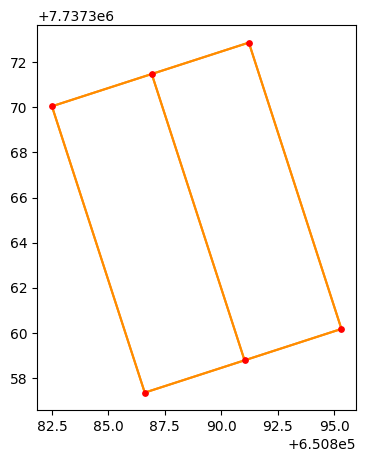

In [4]:
_, ax = plt.subplots(figsize=(5, 5))
buildings[10].plot_SFKB(ax)

<code> get_image_ids() </code> locates the building within the aerial photos and initializes the building-image dictionary.

The values in the dictionary will be a list of building representations in the respective image frames. 

For now they are empty, and will be filled in the next step

In [5]:
buildings = get_image_ids(buildings)
print (f'Image ids: {buildings[10].image_corners.keys()} \n\nImage coordinates: {buildings[10].image_corners.values()}')

Image ids: dict_keys(['14525_04_013_00139', '14525_04_012_00140']) 

Image coordinates: dict_values([[], []])


<code> transform_utm_buildings() </code> performs the transformation from utm to image coordinates

In [6]:
buildings = transform_utm_buildings(buildings)
print (f'Image ids: {buildings[10].image_corners.keys()} \n\nImage coordinates: {buildings[10].image_corners.values()}')

Image ids: dict_keys(['14525_04_013_00139', '14525_04_012_00140']) 

Image coordinates: dict_values([array([[ 3799.9413542 , 20781.9666691 ],
       [ 3725.69428065, 20672.38651107],
       [ 3912.92035716, 20631.01436782],
       [ 3958.63357174, 20674.16782975],
       [ 3884.41754492, 20564.72204905],
       [ 3753.96775374, 20738.99502618]]), array([[  646.22483719, 20875.00588306],
       [  570.09889981, 20767.01465422],
       [  750.47323469, 20722.15337703],
       [  802.40130213, 20764.3560131 ],
       [  726.30902315, 20656.49834925],
       [  594.04126326, 20832.98948693]])])


<code> transform_utm_buildings() </code> makes cutouts of the buildings in the aerial photo and transforms the graphs to the cutout frame. 

The objects and cutouts are dumped at locations specified by the keyword args.

The <code> image_ids </code> argument accepts a list of image ids. 

In [7]:
image_ids = [filename.split('.')[0] for filename in os.listdir('../data/aerial_photos/RGB')[104:114]] # fetches 10 image ids from the RGB folder

dump_cutouts_and_objects(buildings, image_ids)

image 14525_03_001_00105 done
image 14525_03_002_00106 done
image 14525_03_003_00107 done
image 14525_03_004_00108 done
image 14525_03_005_00109 done
image 14525_03_006_00110 done


c:\Users\sigbj\Documents\KAI\src\utils\utils.py:319: RuntimeWarning: divide by zero encountered in divide
  graph_cutout = ((corners.T-loc_min.reshape(-1, 1)+pad+nudge.reshape(-1, 1) + sq_pad.reshape(-1, 1))*image_size/np.array(im.shape[:2]).reshape(2, 1)).T # transform graph to cutout frame


image 14525_03_007_00111 done
image 14525_03_008_00112 done
image 14525_03_009_00113 done
image 14525_03_010_00114 done


There is a try-except block to catch and delete buildings with a single or no corners. 

The building objects can be loaded from the folder, and the objects have a plotting method.

In [9]:
# Load object from folder
object_path = '../results/objects'
buildings = list()
for filename in os.listdir(object_path):
    with open(f'{object_path}/{filename}', 'rb') as file:
        buildings.append(pickle.load(file))

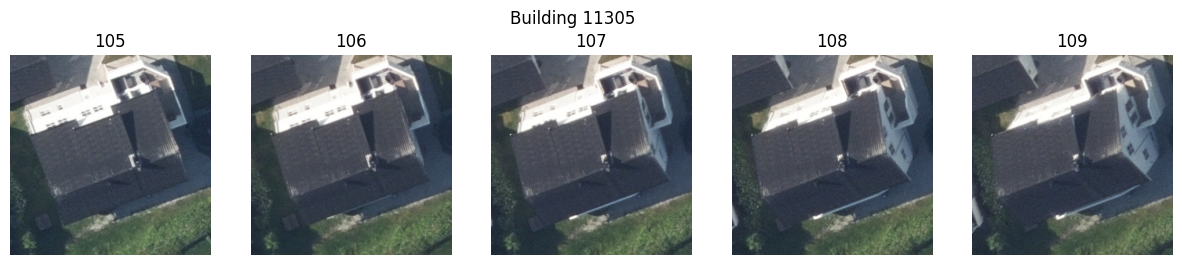

In [17]:
buildings[2].plot_cutout() # plot only the image

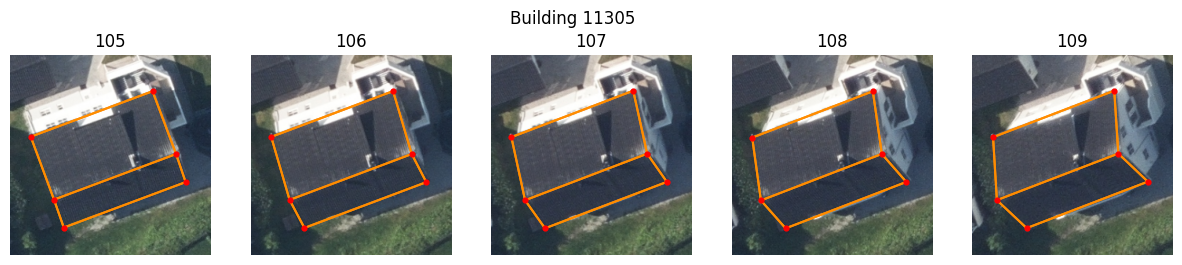

In [18]:
buildings[2].plot_cutout(plot_graph=True) # plot image with transformed sfkb graph